In [1]:
import numpy
import pandas
import seaborn

In [2]:
df = pandas.read_csv('data.csv')
df['temperatureDelta'] = df.apply(lambda row: abs(row['temperature'] - row['perceivedTemperatire']), axis=1)
df = df.set_index('time')

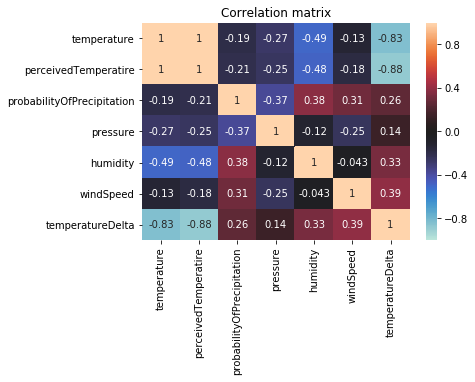

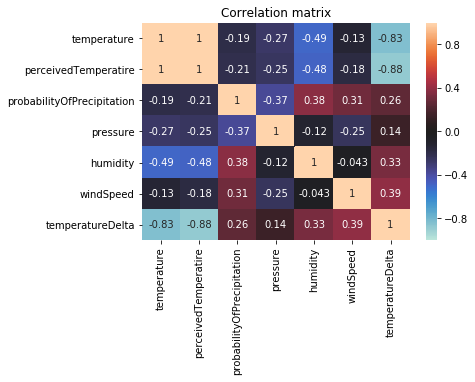

In [3]:
correlations = df.corr()
correlations_axes = seaborn.heatmap(correlations, mask=numpy.zeros_like(correlations, dtype=numpy.bool), vmin=-1, vmax=1, center=0, annot=True)
correlations_axes.set_title('Correlation matrix')
correlations_axes.get_figure()

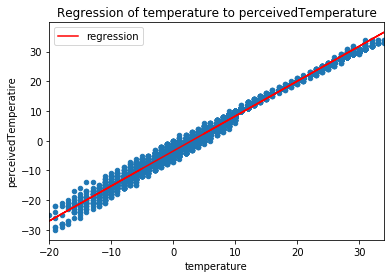

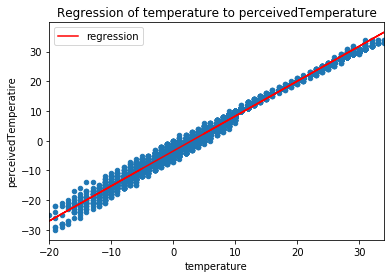

In [4]:
title = 'Regression of temperature to perceivedTemperature'
regression = numpy.polyfit(df['temperature'], df['perceivedTemperatire'], 1)
r_x, r_y = zip(*((i, i*regression[0] + regression[1]) for i in df['temperature']))
regression_df = pandas.DataFrame()
regression_df['temperature'] = r_x
regression_df['perceivedTemperatire'] = r_y
axes = df.plot(kind='scatter', x='temperature', y='perceivedTemperatire', title=title)
regression_df.plot(kind='line', ax=axes, x='temperature', y='perceivedTemperatire', label='regression', c='red')
axes.get_figure()

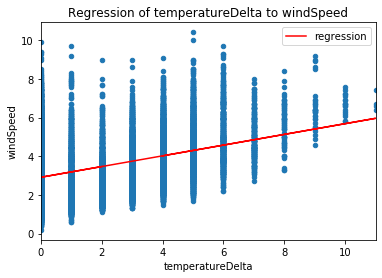

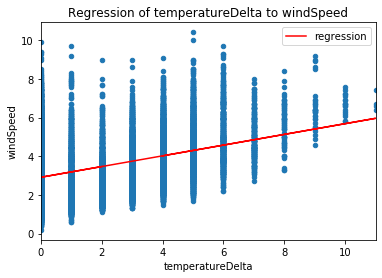

In [5]:
title = 'Regression of temperatureDelta to windSpeed'
regression = numpy.polyfit(df['temperatureDelta'], df['windSpeed'], 1)
r_x, r_y = zip(*((i, i*regression[0] + regression[1]) for i in df['temperatureDelta']))
regression_df = pandas.DataFrame()
regression_df['temperatureDelta'] = r_x
regression_df['windSpeed'] = r_y
axes = df.plot(kind='scatter', x='temperatureDelta', y='windSpeed', title=title)
regression_df.plot(kind='line', ax=axes, x='temperatureDelta', y='windSpeed', label='regression', c='red')
axes.get_figure()